In [42]:
%pip install statsmodels
# Import necessary libraries
import pandas as pd  # For data manipulation and handling
import statsmodels.formula.api as smf  # For statistical modeling
from datetime import datetime
import numpy as np

#Laden des merged_data.csv
merged_data_csv = "/workspaces/DS_ML_Gr_1.5/0_DataPreparation/merged_data_new.csv"
df_merged_data = pd.read_csv(merged_data_csv)

df = pd.DataFrame(df_merged_data)

# Fehlende Werte (NaN) durch 0 ersetzen
print(df)
df_filled = df_merged_data.fillna(0)

#Bennenung der Warengruppne für dataframe Namen
warengruppe_namen = {
    1: 'Brot',
    2: 'Broetchen',
    3: 'Crossaint',
    4: 'Konditorei',
    5: 'Kuchen',
    6: 'Saisonbrot'
}

# Ursprüngliche DataFrames filtern nach Warengruppe
warengruppe_dataframes = {}
for i, name in warengruppe_namen.items():
    var_name = f"df_{name}_W{i}"  # Name erstellen nach: df_Brot_W1
    warengruppe_dataframes[var_name] = df_filled[
        (df_merged_data['Warengruppe'] == i) &
        (df_merged_data['Datum'] <= '2018-07-31')
    ]

# Daten bis 2019-07-31 unabhängig der Warengruppe hinzufügen
new_data = df_merged_data[
    (df_merged_data['Datum'] > '2018-07-31') &
    (df_merged_data['Datum'] <= '2019-08-31')
]

for var_name, df in warengruppe_dataframes.items():
    updated_df = pd.concat([df, new_data], ignore_index=True)
    globals()[var_name] = updated_df

# Fit a linear regression model
# - 'Umsatz' is the dependent variable (target) we aim to predict.
# - 'Warengruppe' represents the size of neighboring lots (continuous feature). (Stimmt zwar nicht, aber erstmal so als Beispiel)
# - 'C(Wochentag)' treats the 'Wochentag' feature as a categorical variable.
mod = smf.ols('Umsatz ~ C(Inflationsrate)+Heimspiel+Weihnachtsmarkt+Markt+C(Faehrverkaehr)+C(Kreuzfahrverkehr)+C(Temperatur)+Monat+ Frühling+Sommer+Herbst+Winter+Temp_warm+Temp_cold+Temp_average+ Monday+Tuesday+Wednesday+Thursday+Friday+Saturday+Sunday', data=df_merged_data).fit()

# Output the summary of the fitted model
# The summary includes key metrics such as R-squared, coefficients, and p-values.
print(mod.summary())
data=df_Konditorei_W4
print(data.head())


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
           Datum  Inflationsrate  Heimspiel  Weihnachtsmarkt  Markt  \
0     2013-07-01            1.53          0                0      0   
1     2013-07-01            1.53          0                0      0   
2     2013-07-01            1.53          0                0      0   
3     2013-07-01            1.53          0                0      0   
4     2013-07-01            1.53          0                0      0   
...          ...             ...        ...              ...    ...   
9732  2019-07-27             NaN          1                0      0   
9733  2019-07-28             NaN          0                0      0   
9734  2019-07-29             NaN          0                0      0   
9735  2019-07-30             NaN          0                0      0   
9736  2019-07-31             NaN          

                            OLS Regression Results                            
Dep. Variable:                 Umsatz   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.591
Date:                Sun, 15 Dec 2024   Prob (F-statistic):              0.174
Time:                        16:59:24   Log-Likelihood:                -7091.8
No. Observations:                1409   AIC:                         1.419e+04
Df Residuals:                    1404   BIC:                         1.422e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               89.6066      1.587  

/tmp/ipykernel_6950/258568841.py:70: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color="red")


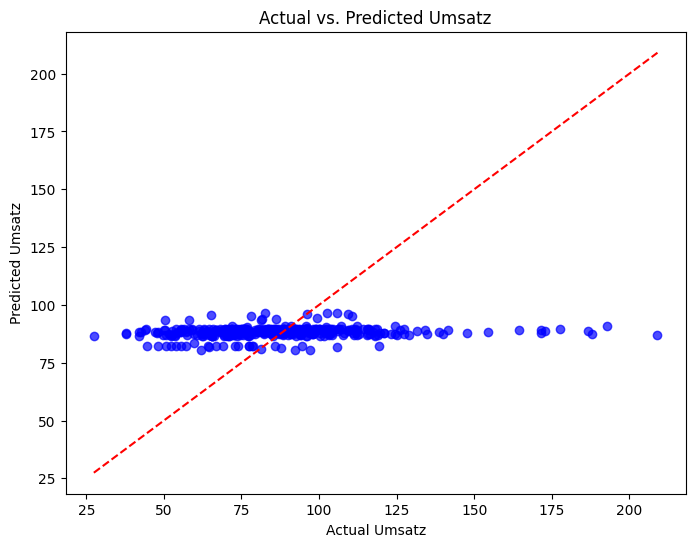

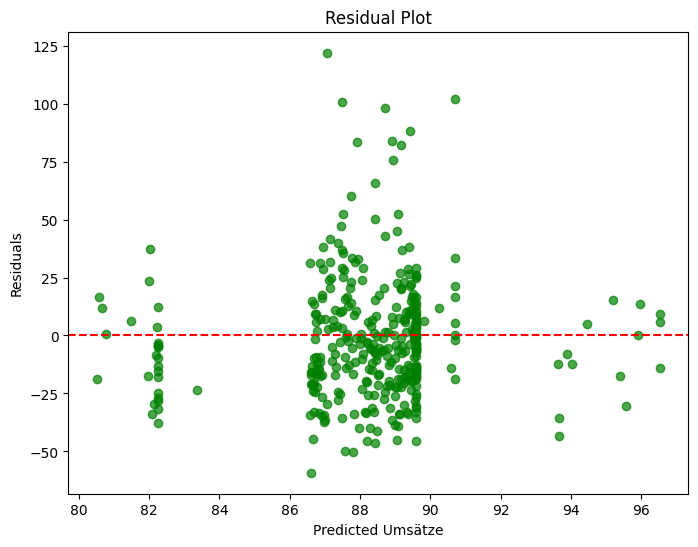

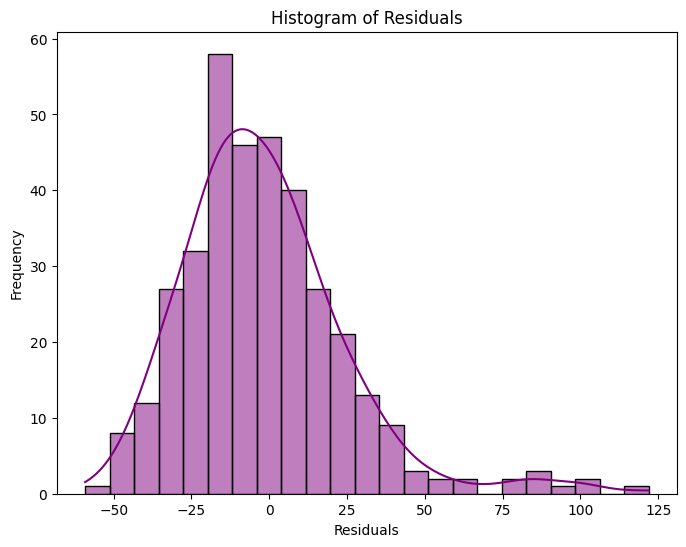

/tmp/ipykernel_6950/258568841.py:104: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette="Blues_r")


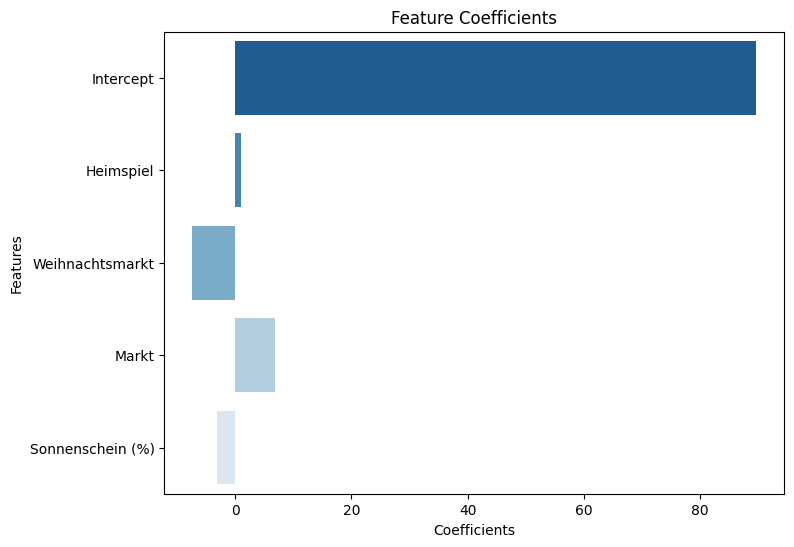

In [43]:
# Import necessary libraries
import pandas as pd  # Data manipulation and handling
import statsmodels.api as sm  # Building and summarizing regression models
from sklearn.preprocessing import StandardScaler  # Scaling features for regression
from sklearn.model_selection import train_test_split  # Splitting data into train and test sets
import matplotlib.pyplot as plt  # Visualization library
import seaborn as sns  # Advanced data visualizations

# Load the dataset 
#data1=pd.read_csv("/workspaces/DS_ML_Gr_1.5/0_DataPreparation/merged_data_new.csv")
#Warengruppe=4
#data = data1[data1['Warengruppe'] == Warengruppe]
#print (data.head())
data=data

#'Inflationsrate','Heimspiel','Weihnachtsmarkt', 'Markt', 'Faehrverkaehr','Kreuzfahrverkehr','Temperatur','Monat' ,'Frühling','Sommer','Herbst','Winter','Temp_warm','Temp_cold','Temp_average', 'Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'

# Select features and target variable
# Features include the different Warengruppen, Monday y/n
features = ['Heimspiel','Weihnachtsmarkt', 'Markt', 'Sonnenschein (%)']
X = data[features] #target variable: Umsatz

# Scale the feature data to standardize the range
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define your date thresholds
train_end_date = '2017-07-31'
validation_end_date = '2018-07-31'

# Convert to datetime if not already
data['Datum'] = pd.to_datetime(data['Datum'])
# Split the data based on the date thresholds
train_data = data[data['Datum'] <= train_end_date]
validation_data = data[(data['Datum'] > train_end_date) & (data['Datum'] <= validation_end_date)]
test_data = data[data['Datum'] > validation_end_date]

X_train = train_data[features]
y_train = train_data['Umsatz']
X_test=X_validation = validation_data[features]
y_test=y_validation = validation_data['Umsatz']
#X_test = test_data[features] erstmal so, da die gewünschten daten, keine Daten für test Daten übrig lassen
#y_test = test_data['Umsatz']




# Add a constant term to the training data for the regression intercept
X_train = sm.add_constant(X_train)

# Train the linear regression model using Statsmodels
model = sm.OLS(y_train, X_train).fit()

# Print the summary of the regression model
# Includes metrics like R-squared, coefficients, and p-values for each feature
print(model.summary())

# Make predictions on the test set
X_test = sm.add_constant(X_test)  # Add constant to test set for predictions
predictions = model.predict(X_test)
print("Predictions for test data:", predictions)

# Calculate Mean Absolute Percentage Error (MAPE) for error evaluation
mape = (abs((y_test - predictions) / y_test).mean()) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# Scatter plot: Actual vs. Predicted Umsatz
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, alpha=0.7, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color="red")
plt.xlabel("Actual Umsatz")
plt.ylabel("Predicted Umsatz")
plt.title("Actual vs. Predicted Umsatz")
plt.show()

# Calculate residuals (differences between actual and predicted Umsätze)
residuals = y_test - predictions

# Residual plot: Predicted Umsätze vs. Residuals
plt.figure(figsize=(8, 6))
plt.scatter(predictions, residuals, alpha=0.7, color="green")
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Predicted Umsätze")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

# Histogram of residuals to check normality
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color="purple")
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# Create a DataFrame of model coefficients
coefficients = pd.DataFrame({
    'Feature': ['Intercept'] + features,
    'Coefficient': model.params
})

# Bar plot of feature coefficients
plt.figure(figsize=(8, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette="Blues_r")
plt.title("Feature Coefficients")
plt.xlabel("Coefficients")
plt.ylabel("Features")
plt.show()

Predictions for test data: [88.74446662 88.48353769 88.7082083  88.45685468 87.88339667]
Mean Absolute Error (MAE): 19.63
Mean Squared Error (MSE): 690.90
Mean Absolute Percentage Error (MAPE): 25.31%


/tmp/ipykernel_6950/803945709.py:65: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color="red")


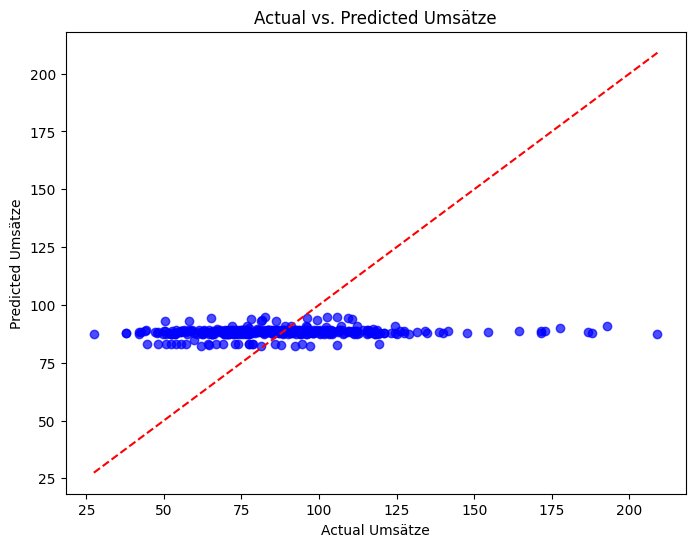

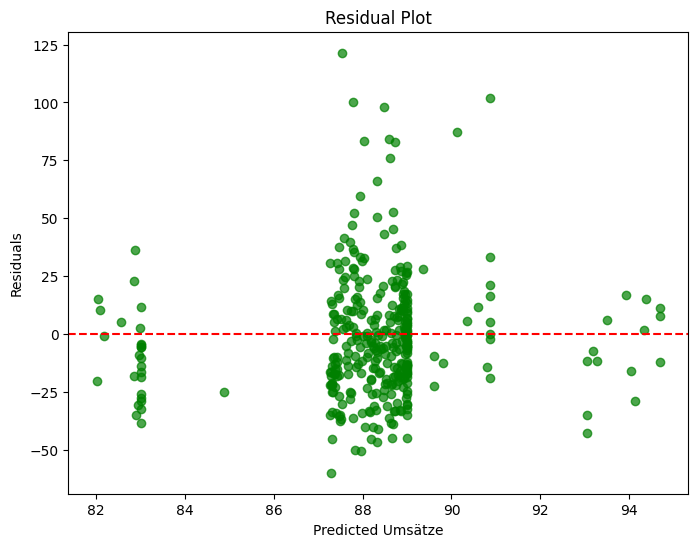

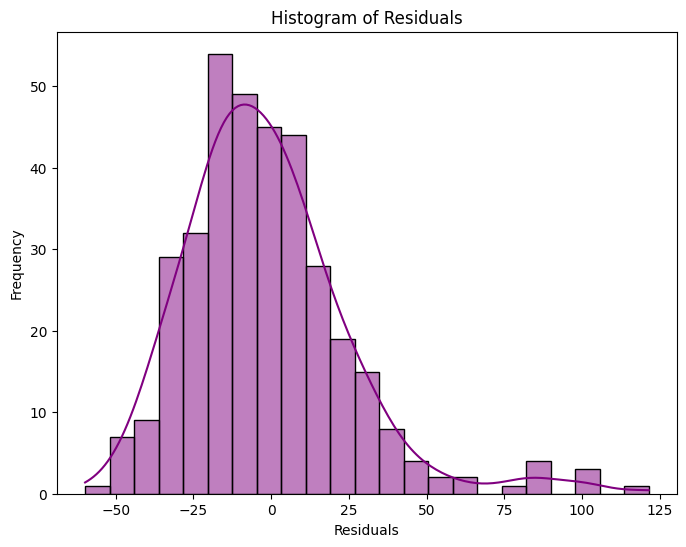

/tmp/ipykernel_6950/803945709.py:99: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette="Blues_r")


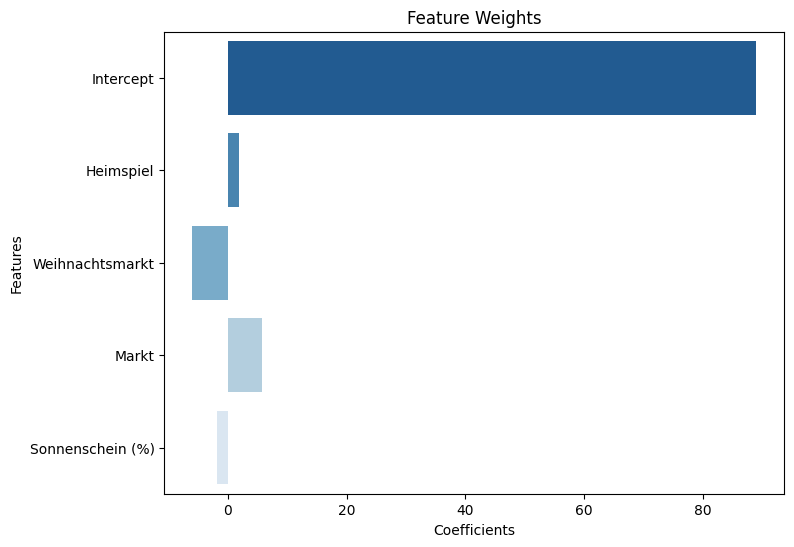

In [44]:
# Import necessary libraries
from sklearn.linear_model import SGDRegressor  # Stochastic Gradient Descent Regressor
from sklearn.metrics import mean_absolute_error, mean_squared_error  # Evaluation metrics
import pandas as pd  # Data manipulation
import matplotlib.pyplot as plt  # Visualization
import seaborn as sns  # Advanced visualizations
from sklearn.model_selection import train_test_split  # Splitting data into train and test sets

# Load the dataset 
#data1=pd.read_csv("/workspaces/DS_ML_Gr_1.5/0_DataPreparation/merged_data_new.csv")
#Warengruppe=4
#data = data1[data1['Warengruppe'] == Warengruppe]
#print (data.head())

#'Inflationsrate','Heimspiel','Weihnachtsmarkt', 'Markt', 'Faehrverkaehr','Kreuzfahrverkehr','Temperatur','Monat' ,'Frühling','Sommer','Herbst','Winter','Temp_warm','Temp_cold','Temp_average', 'Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'

# Select features and target variable
# Features include the different Warengruppen, Monday y/n
features = ['Heimspiel','Weihnachtsmarkt', 'Markt','Sonnenschein (%)']
X = data[features] #target variable: Umsatz

# Define your date thresholds
train_end_date = '2017-07-31'
validation_end_date = '2018-07-31'

# Convert to datetime if not already
data['Datum'] = pd.to_datetime(data['Datum'])
# Split the data based on the date thresholds
train_data = data[data['Datum'] <= train_end_date]
validation_data = data[(data['Datum'] > train_end_date) & (data['Datum'] <= validation_end_date)]
test_data = data[data['Datum'] > validation_end_date]

X_train = train_data[features]
y_train = train_data['Umsatz']
X_test=X_validation = validation_data[features]
y_test=y_validation = validation_data['Umsatz']
#X_test = test_data[features] erstmal so, da die gewünschten daten, keine Daten für test Daten übrig lassen
#y_test = test_data['Umsatz']

# Train a Stochastic Gradient Descent (SGD) Regressor
# Parameters:
# - max_iter: Maximum number of iterations for training.
# - learning_rate: Type of learning rate schedule ('invscaling' decreases learning rate over time).
# - eta0: Initial learning rate.
sgd_model = SGDRegressor(max_iter=1000, learning_rate='invscaling', eta0=0.01, random_state=42)
sgd_model.fit(X_train, y_train)

# Make predictions on the test set
sgd_predictions = sgd_model.predict(X_test)
print("Predictions for test data:", sgd_predictions[:5])  # Display first 5 predictions

# Calculate error metrics
mae = mean_absolute_error(y_test, sgd_predictions)  # Mean Absolute Error
mse = mean_squared_error(y_test, sgd_predictions)  # Mean Squared Error
mape = (abs((y_test - sgd_predictions) / y_test).mean()) * 100  # Mean Absolute Percentage Error

# Print error metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# Plot: Actual vs. Predicted Prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, sgd_predictions, alpha=0.7, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color="red")
plt.xlabel("Actual Umsätze")
plt.ylabel("Predicted Umsätze")
plt.title("Actual vs. Predicted Umsätze")
plt.show()

# Calculate residuals (differences between actual and predicted values)
residuals = y_test - sgd_predictions

# Residual plot: Predicted Umsätze vs. Residuals
plt.figure(figsize=(8, 6))
plt.scatter(sgd_predictions, residuals, alpha=0.7, color="green")
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Predicted Umsätze")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

# Histogram of residuals to check distribution
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color="purple")
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# Extract and display model coefficients
coefficients = pd.DataFrame({
    'Feature': ['Intercept'] + features,
    'Coefficient': [sgd_model.intercept_[0]] + list(sgd_model.coef_)
})

# Bar plot of feature coefficients
plt.figure(figsize=(8, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette="Blues_r")
plt.title("Feature Weights")
plt.xlabel("Coefficients")
plt.ylabel("Features")
plt.show()


In [45]:
# Import necessary libraries
import pandas as pd  # For data manipulation
from sklearn.model_selection import train_test_split, GridSearchCV  # Train-test split and hyperparameter tuning
from sklearn.linear_model import Ridge  # Ridge Regression model
from sklearn.metrics import mean_absolute_error, mean_squared_error  # Evaluation metrics

# Load the dataset 
#data1=pd.read_csv("/workspaces/DS_ML_Gr_1.5/0_DataPreparation/merged_data_new.csv")
#Warengruppe=4
#data = data1[data1['Warengruppe'] == Warengruppe]
#print (data.head())

#'Inflationsrate','Heimspiel','Weihnachtsmarkt', 'Markt', 'Faehrverkaehr','Kreuzfahrverkehr','Temperatur','Monat' ,'Frühling','Sommer','Herbst','Winter','Temp_warm','Temp_cold','Temp_average', 'Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'

# Select features and target variable
# Features include the different Warengruppen, Monday y/n
features = ['Heimspiel','Weihnachtsmarkt', 'Markt','Sonnenschein (%)']
X = data[features] #target variable: Umsatz

# Define your date thresholds
train_end_date = '2017-07-31'
validation_end_date = '2018-07-31'
test_end_date='2019-07-30'

# Convert to datetime if not already
data['Datum'] = pd.to_datetime(data['Datum'])
# Split the data based on the date thresholds
train_data = data[data['Datum'] <= train_end_date]
validation_data = data[(data['Datum'] > train_end_date) & (data['Datum'] <= validation_end_date)]
test_data = data[(data['Datum'] > validation_end_date) & (data['Datum'] <= test_end_date)]

X_train = train_data[features]
y_train = train_data['Umsatz']
X_validation = validation_data[features]
y_validation = validation_data['Umsatz']
X_test = test_data[features] 
y_test = test_data['Umsatz']

# Initialize Ridge Regression model
ridge = Ridge()

# Define hyperparameter grid for alpha (regularization strength)
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100]  # Testing a range of regularization strengths
}

# Create a GridSearchCV object for hyperparameter tuning
# - cv=5: 5-fold cross-validation
# - scoring='neg_mean_absolute_error': Metric for selecting the best model (negative MAE)
# - verbose=1: Display progress during grid search
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error', verbose=1)

# Train Ridge Regression model using GridSearchCV
grid_search.fit(X_train, y_train)

# Output the best hyperparameters from the grid search
print("Best Hyperparameters:", grid_search.best_params_)

# Retrieve the best model from the grid search
best_model = grid_search.best_estimator_

# Make predictions on the test set
predictions = best_model.predict(X_test)

# Calculate error metrics
mae = mean_absolute_error(y_test, predictions)  # Mean Absolute Error
mse = mean_squared_error(y_test, predictions)  # Mean Squared Error
mape = (abs((y_test - predictions) / y_test).mean()) * 100  # Mean Absolute Percentage Error

# Output evaluation metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

#sample=pd.read_csv('sample_submission.csv')
#sample['Umsatz']=sample['Umsatz'].replace(predictions.iloc[:,0])

#sample.to_csv=('predictions.csv',index==False)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Hyperparameters: {'alpha': 100}


ValueError: Input contains NaN.